The [Ouchi illusion](https://mathworld.wolfram.com/OuchiIllusion.html) is a powerful demonstration that static images may produce an illusory movement. One striking aspect is that it makes you feel quite dizzy from trying to compensate for this illusory movement.

![ouchi.jpg](https://mathworld.wolfram.com/images/gifs/ouchi.jpg)

The illlusion is is generated by your own eye movements and is a consequence of the [aperture problem](https://en.wikipedia.org/wiki/Aperture_problem), which is a fundamental problem in vision science. The aperture problem is the fact that the visual system can only integrate information along the direction of motion, and not perpendicular to it. This is because the visual system is made of a set of filters that are oriented in different directions, and the integration is done by summing the responses of these filters. The aperture problem is a problem because it means that the visual system cannot recover the direction of motion of a contour from the responses of these filters.

Here, we explore variations of this illusion which xwould use textures instead of regular angles using the [MotionClouds](https://github.com/NeuralEnsemble/MotionClouds) library. The idea is to use the same texture in the two parts of the image (center vs surround), but to shift the texture in one half. Optimizing the parameters of the texture would help tell us what matters to generate that illusion.

<!-- TEASER_END -->

Let's first initialize the notebook:

In [1]:
from __future__ import division, print_function
import numpy as np
np.set_printoptions(precision=6, suppress=True)
%matplotlib inline
import matplotlib.pyplot as plt
fig_width = 10
figsize = (fig_width, fig_width)


## install and load the library

In [2]:
%pip install MotionClouds

Note: you may need to restart the kernel to use updated packages.


In particular, we just generate [one frame](https://laurentperrinet.github.io/sciblog/posts/2016-07-14_static-motion-clouds.html):

In [3]:
import MotionClouds as mc
mc.N_frame = 1
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)
params = dict(theta=0, B_sf=.06, sf_0=.3, B_theta=.1)
params = dict(theta=0, B_sf=.05, sf_0=.15, B_theta=.1)
env = mc.envelope_gabor(fx, fy, ft, **params)
z = mc.rectif(mc.random_cloud(env))
image = z.reshape((mc.N_X, mc.N_Y))

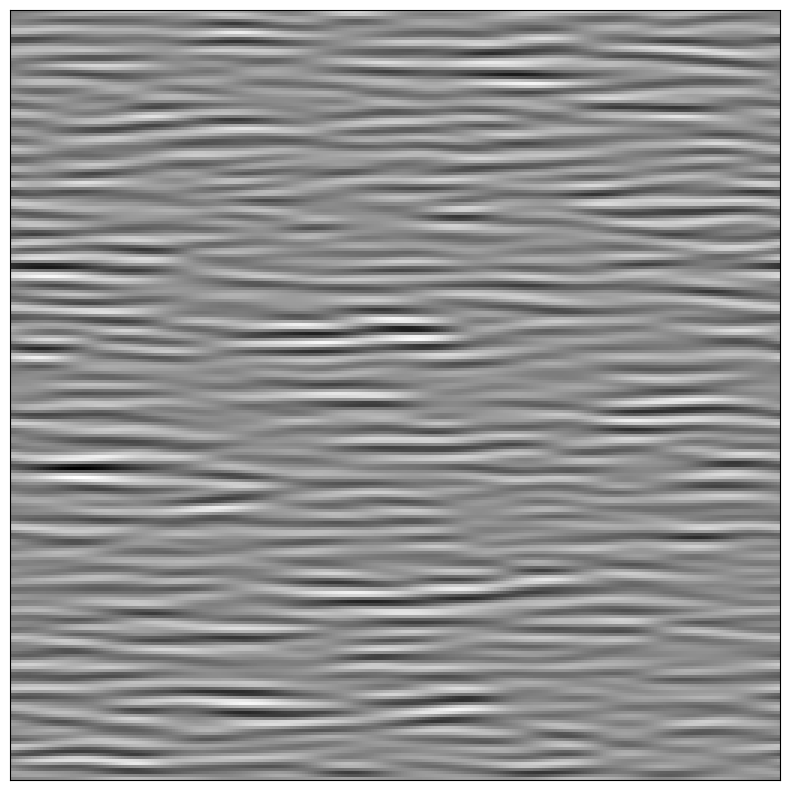

In [4]:
import matplotlib.pyplot as plt
for key in ['xtick.bottom', 'xtick.labelbottom', 'ytick.left', 'ytick.labelleft']: plt.rcParams[key] = False
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(image, cmap=plt.gray())

## define a crop function

The library has a representation of space that we may take advantage of:

-0.5 0.49609375


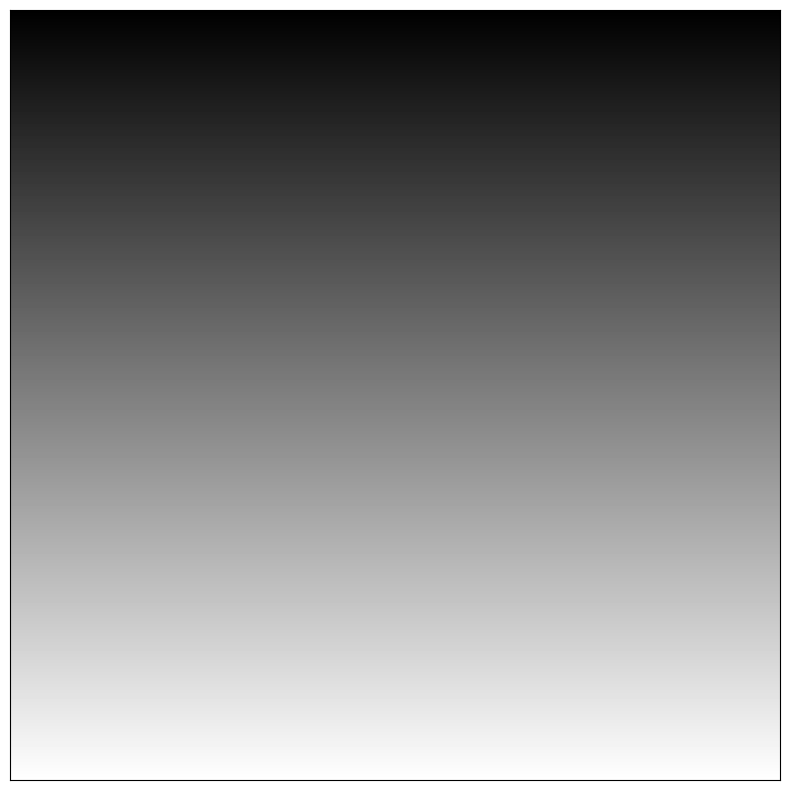

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(fx, cmap=plt.gray())
print(fx.min(), fx.max())

We may easily define a central cropping mask:

False True


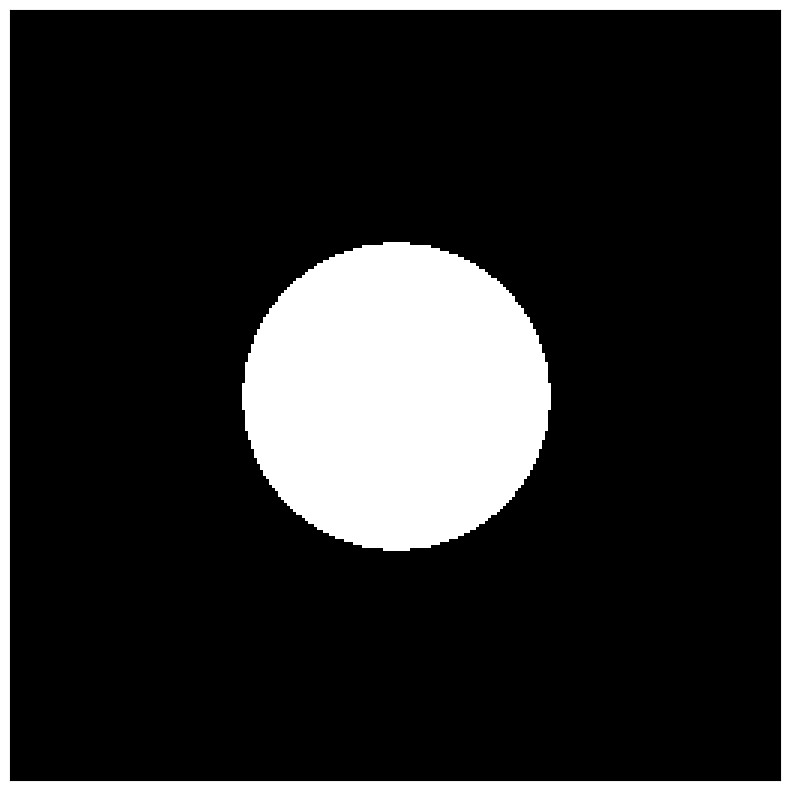

In [6]:
rho = .2 
mask = ((fx**2 + fy**2) < rho**2)

fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(mask, cmap=plt.gray())
print(mask.min(), mask.max())

From this we define a cropping function

In [7]:
def crop_and_merge(image, rho=.25, use_rot=True, use_fill=False, fill=.5):
    N_X, N_Y = image.shape

    image_fig = image.copy()
    if use_rot: image_fig = np.rot90(image_fig)
    image_fig = np.roll(image_fig, N_X//4 + int(N_X//2*np.random.rand()), axis=0 ) # roll over one axis
    image_fig = np.roll(image_fig, N_Y//4 + int(N_Y//2*np.random.rand()), axis=1 ) # roll over one axis    

    fx, fy, _ = mc.get_grids(N_X, N_Y, 1)
    mask = ((fx.squeeze()**2 + fy.squeeze()**2) < rho**2)

    if use_fill:
        return image * (1-mask) + fill * mask
    else:
        return image * (1-mask) + image_fig * mask
        

## vanilla textured Ouchi illusion

We may now define a function that generates the Ouchi illusion:

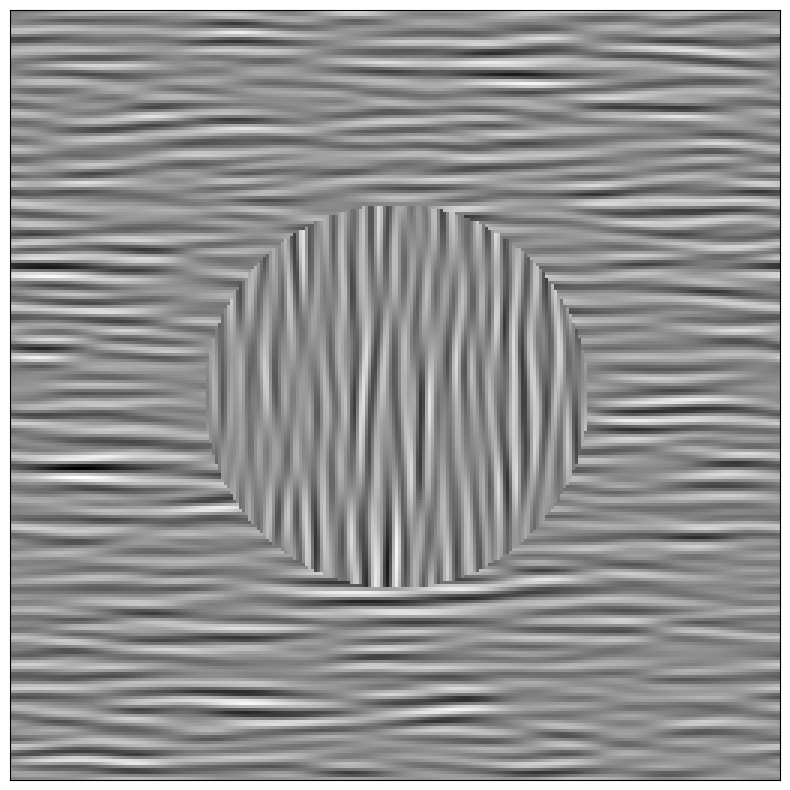

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(crop_and_merge(image, rho=.25, use_rot=True), cmap=plt.gray())

and without:

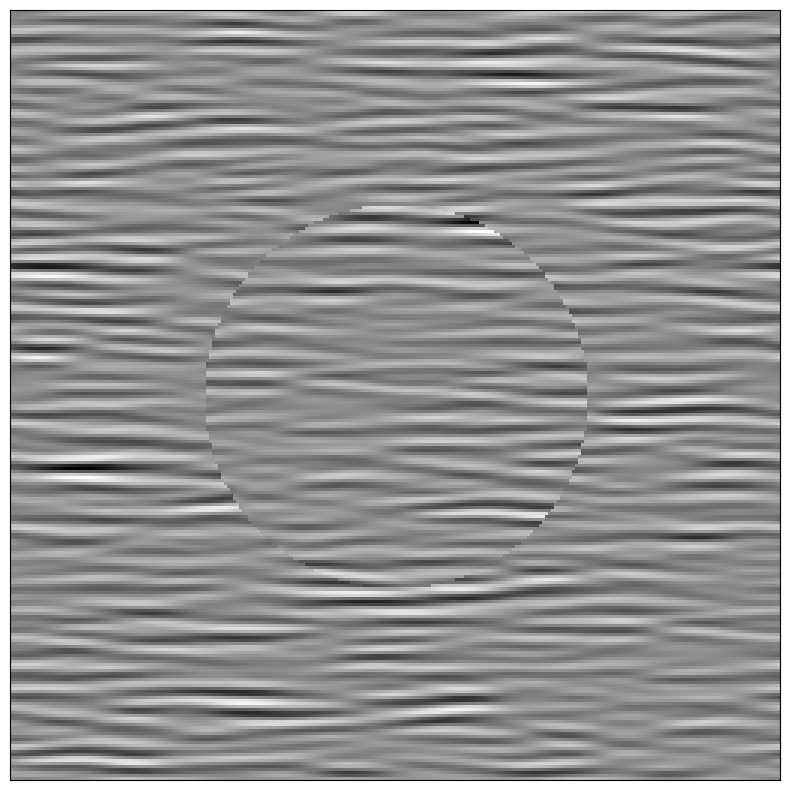

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(crop_and_merge(image, rho=.25, use_rot=False), cmap=plt.gray())

We can also define a first-order figure:

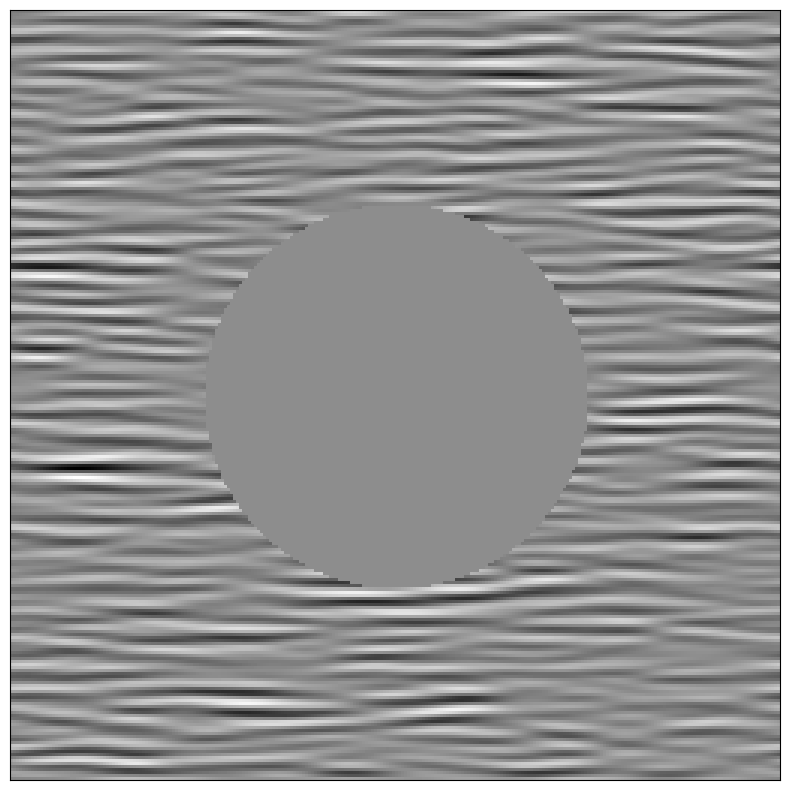

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(crop_and_merge(image, rho=.25, use_fill=True), cmap=plt.gray())


## changing parameters of the textured Ouchi illusion

We may now define a function that generates the Ouchi illusion:

sf_0=0.015


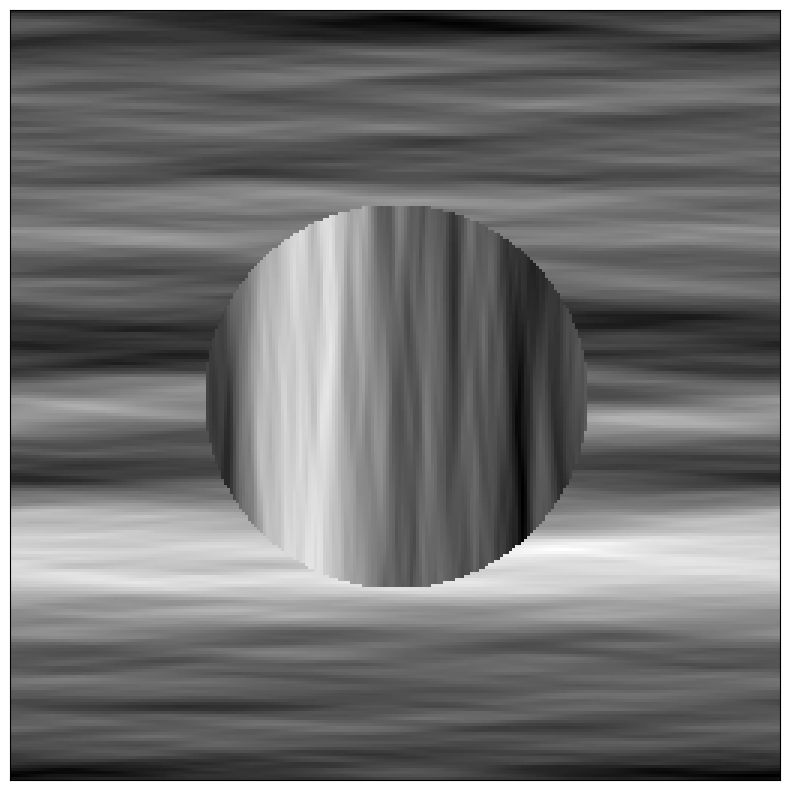

sf_0=0.026


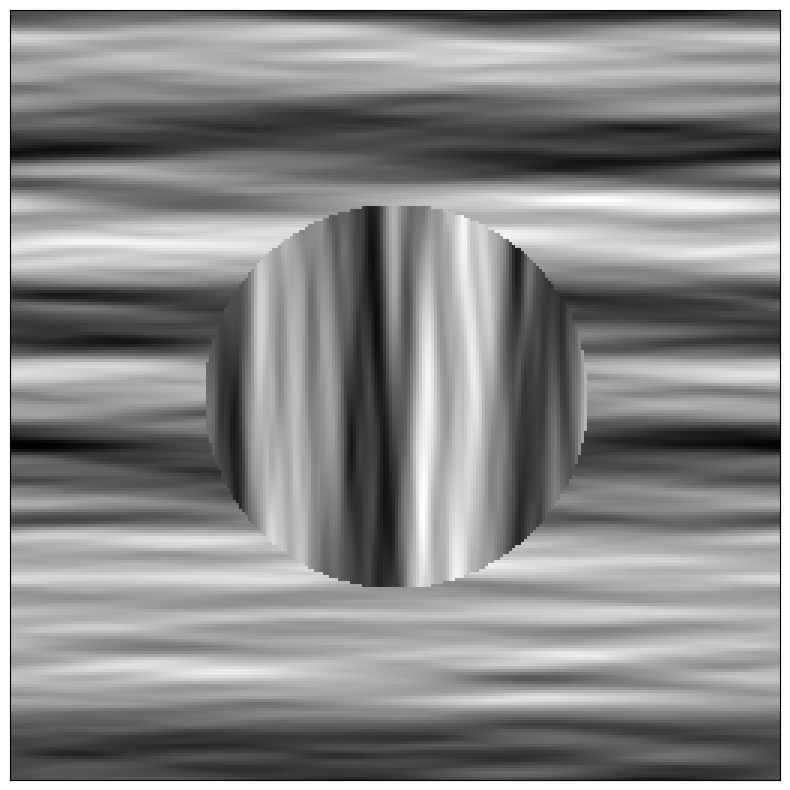

sf_0=0.047


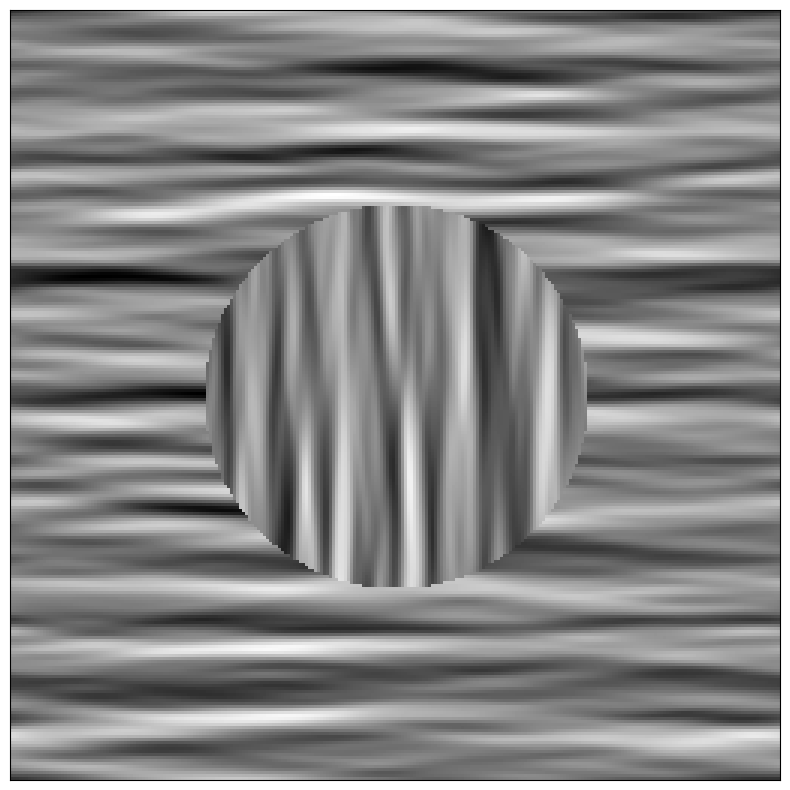

sf_0=0.082


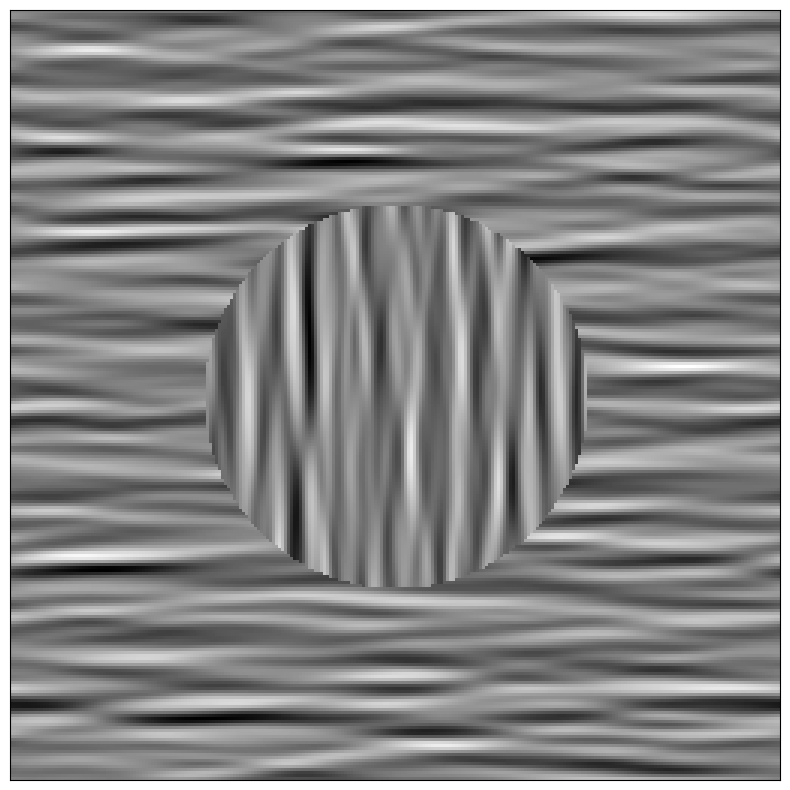

sf_0=0.145


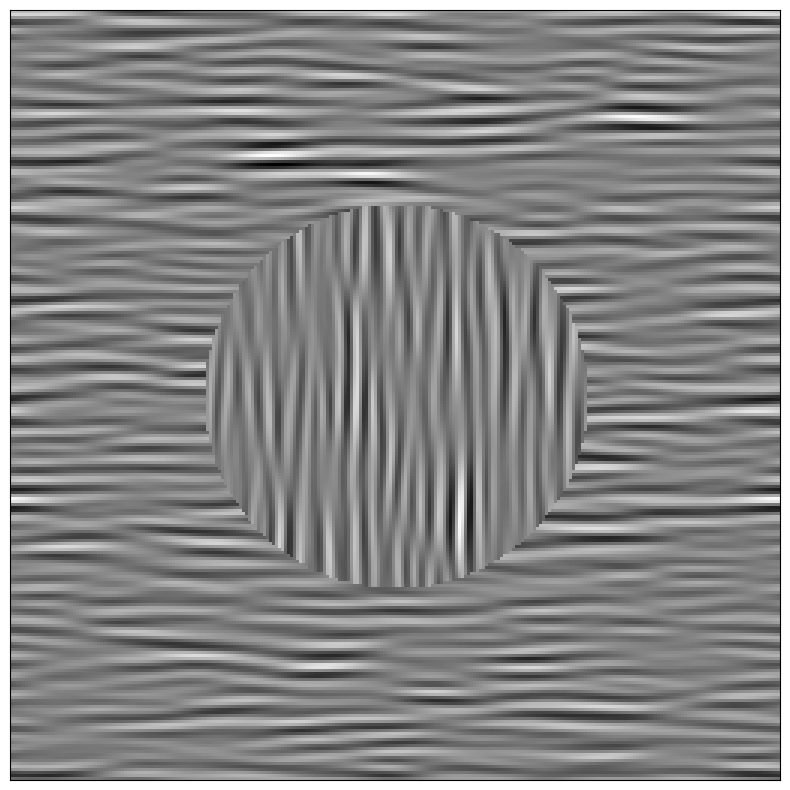

sf_0=0.255


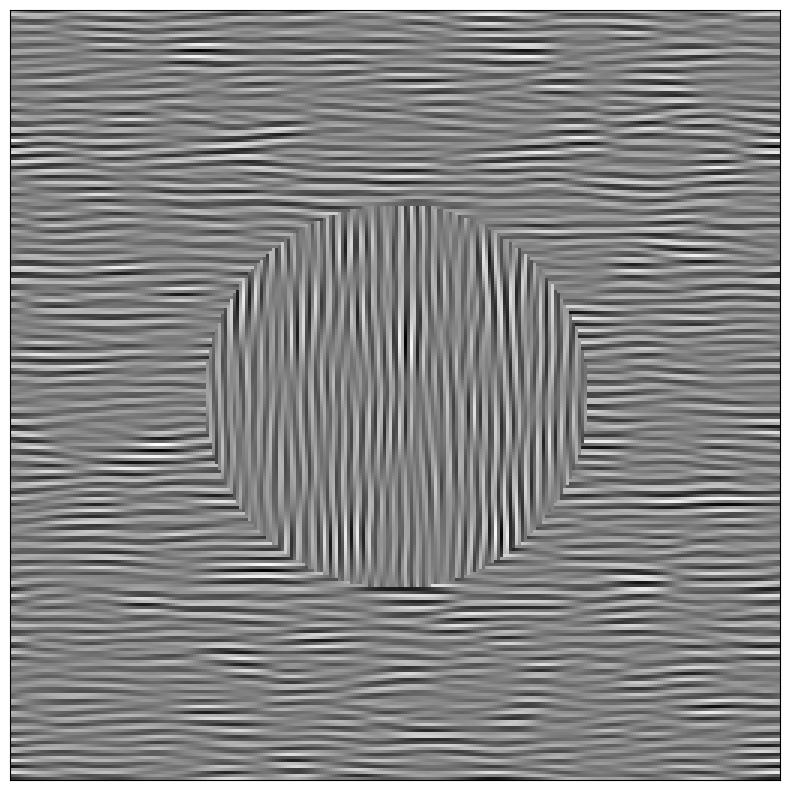

sf_0=0.450


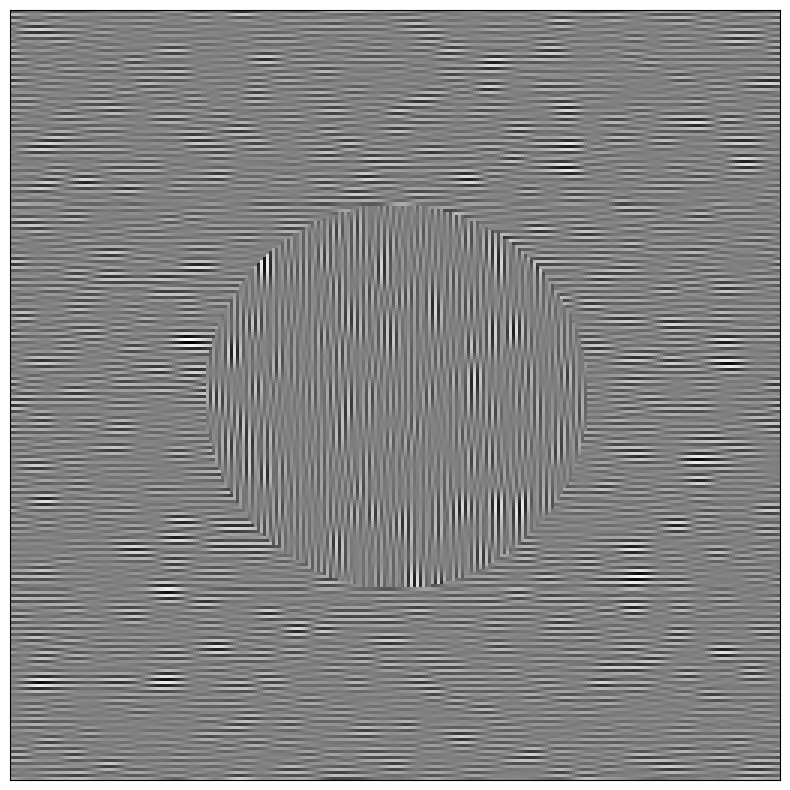

In [11]:
for sf_0 in params['sf_0'] * np.geomspace(0.1, 3, 7):
    print(f'{sf_0=:.3f}')
    params_update = params.copy()
    params_update.update(sf_0=sf_0)
    env = mc.envelope_gabor(fx, fy, ft, **params_update)
    z = mc.rectif(mc.random_cloud(env))
    image = z.reshape((mc.N_X, mc.N_Y))
    fig, ax = plt.subplots(figsize=(10,10))
    _ = ax.imshow(crop_and_merge(image, rho=.25, use_rot=True), cmap=plt.gray())
    plt.show()

B_sf=0.005


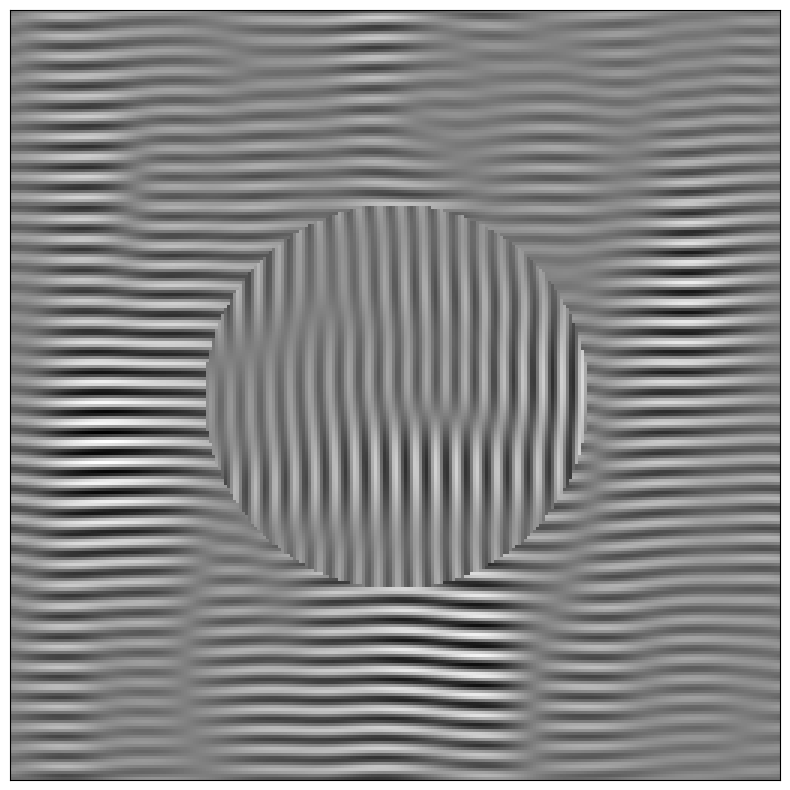

B_sf=0.011


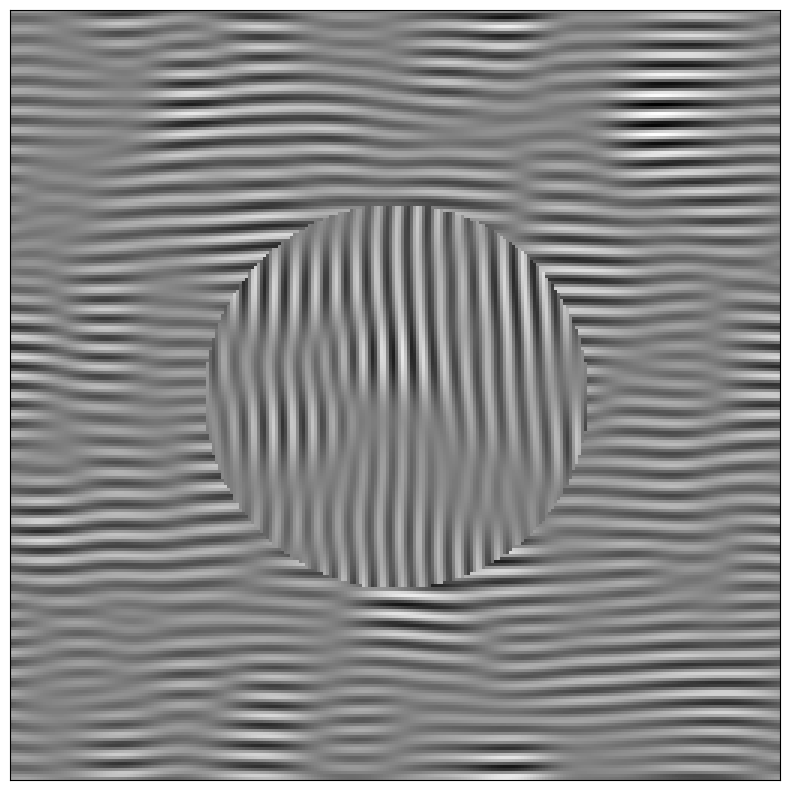

B_sf=0.023


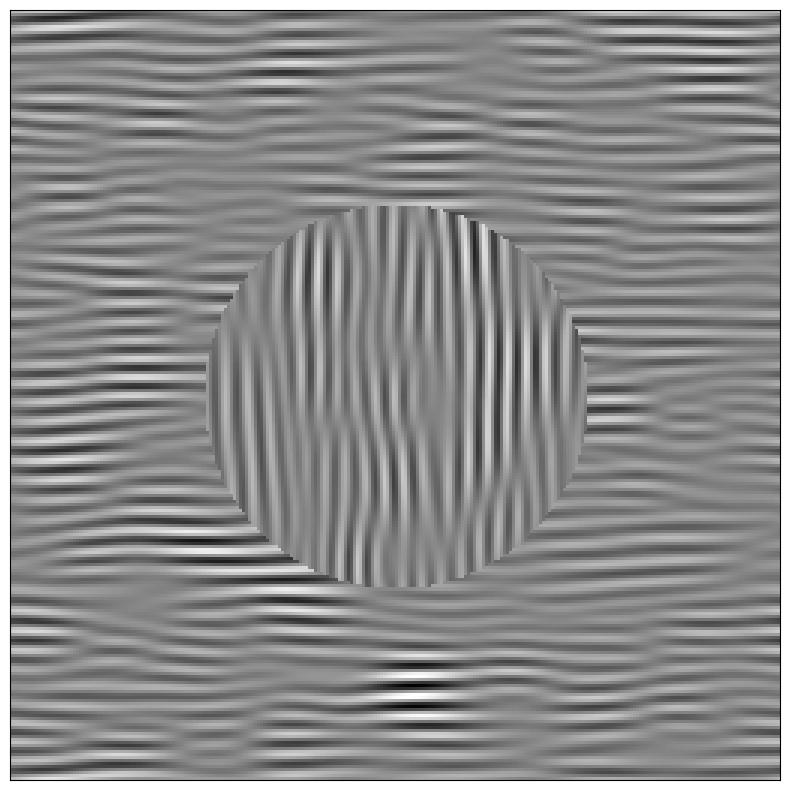

B_sf=0.050


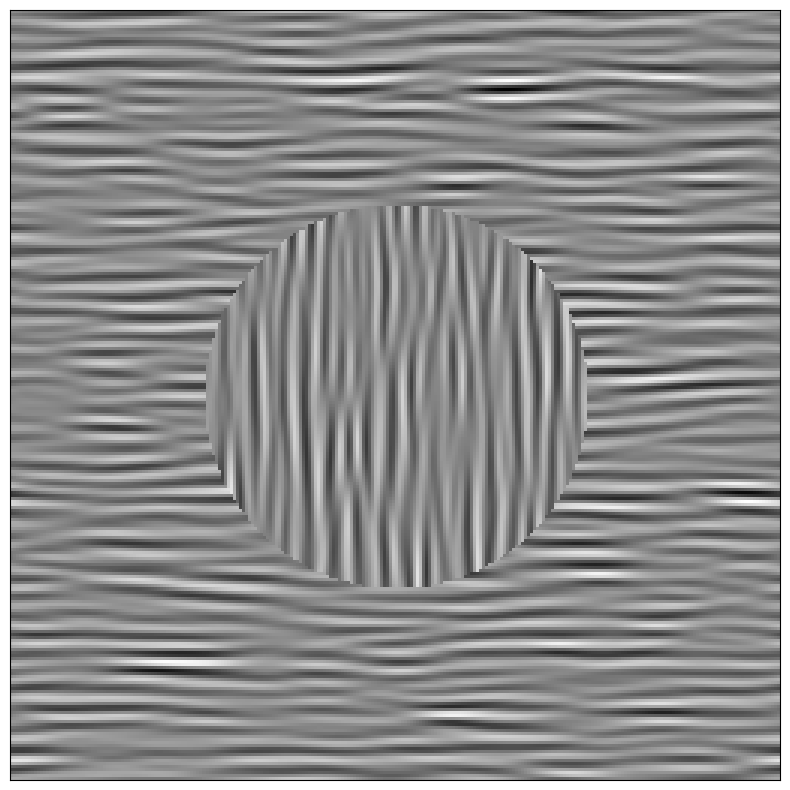

B_sf=0.108


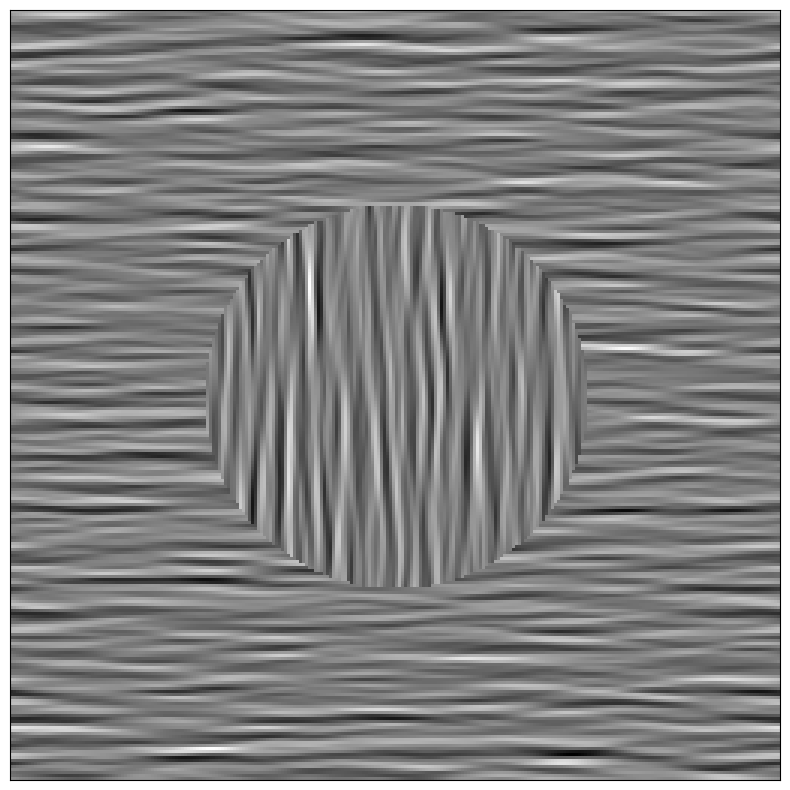

B_sf=0.232


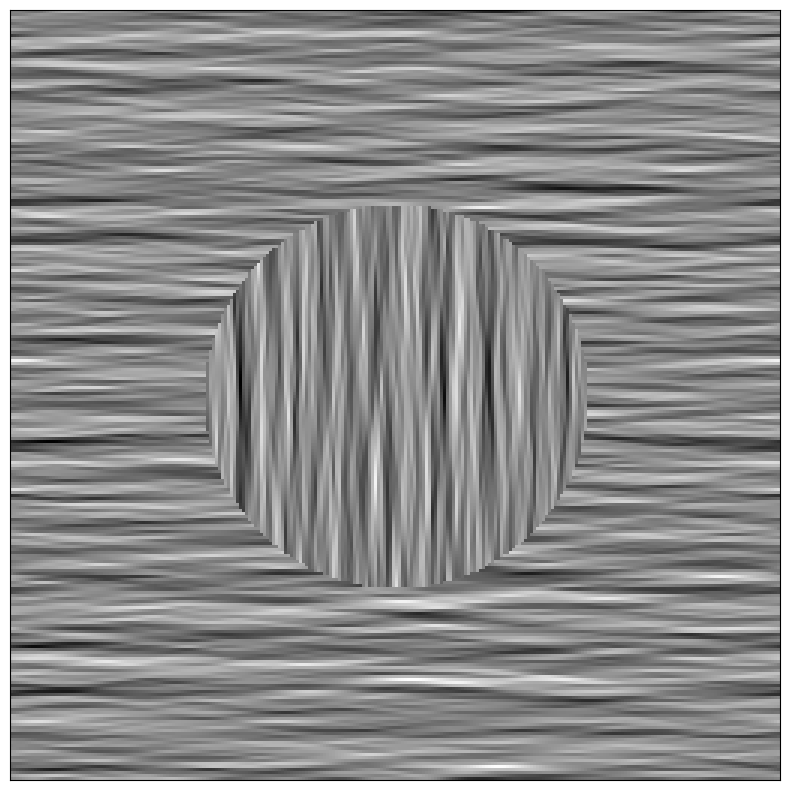

B_sf=0.500


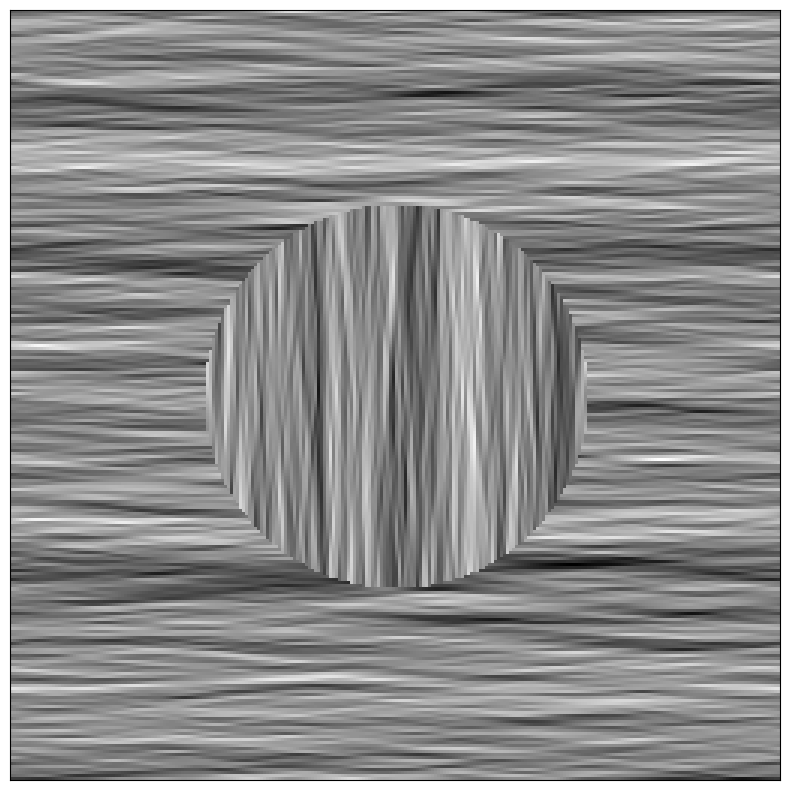

In [12]:
for B_sf in params['B_sf'] * np.geomspace(0.1, 10, 7):
    print(f'{B_sf=:.3f}')
    params_update = params.copy()
    params_update.update(B_sf=B_sf)
    env = mc.envelope_gabor(fx, fy, ft, **params_update)
    z = mc.rectif(mc.random_cloud(env))
    image = z.reshape((mc.N_X, mc.N_Y))
    fig, ax = plt.subplots(figsize=(10,10))
    _ = ax.imshow(crop_and_merge(image, rho=.25, use_rot=True), cmap=plt.gray())
    plt.show()

theta=0.000


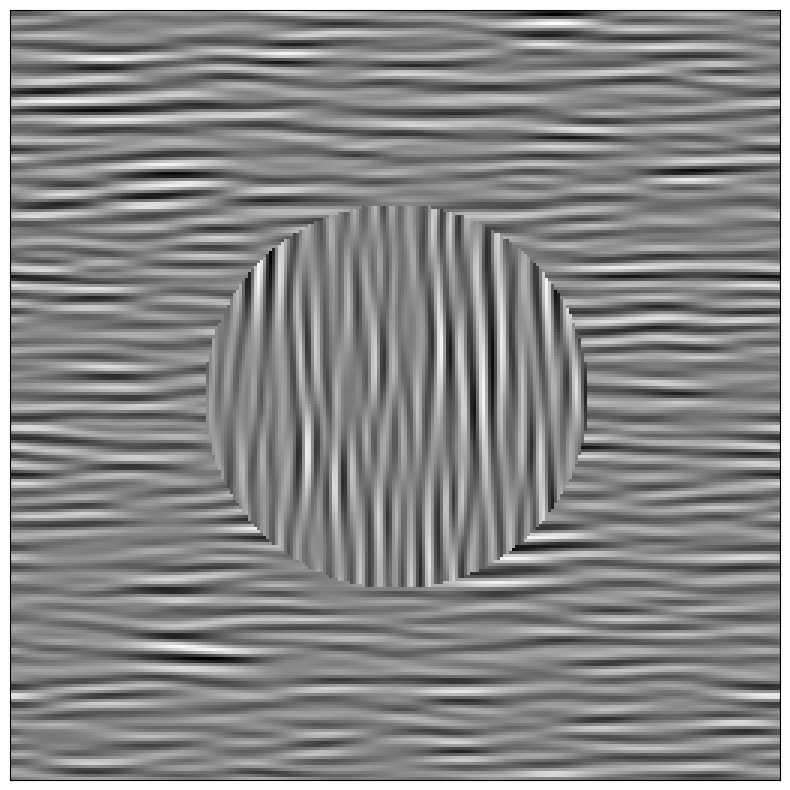

theta=0.000


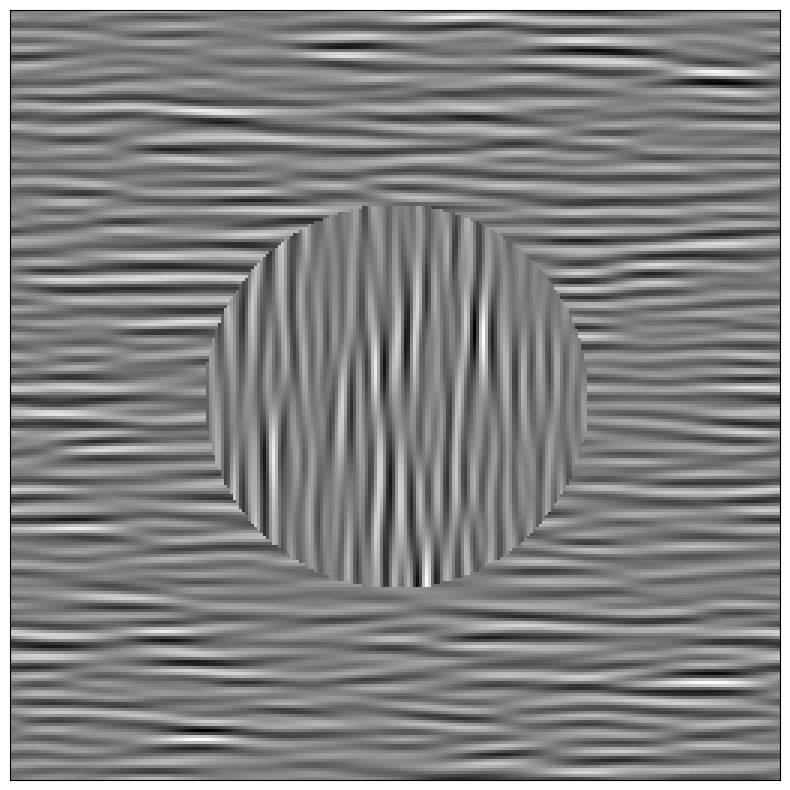

theta=0.000


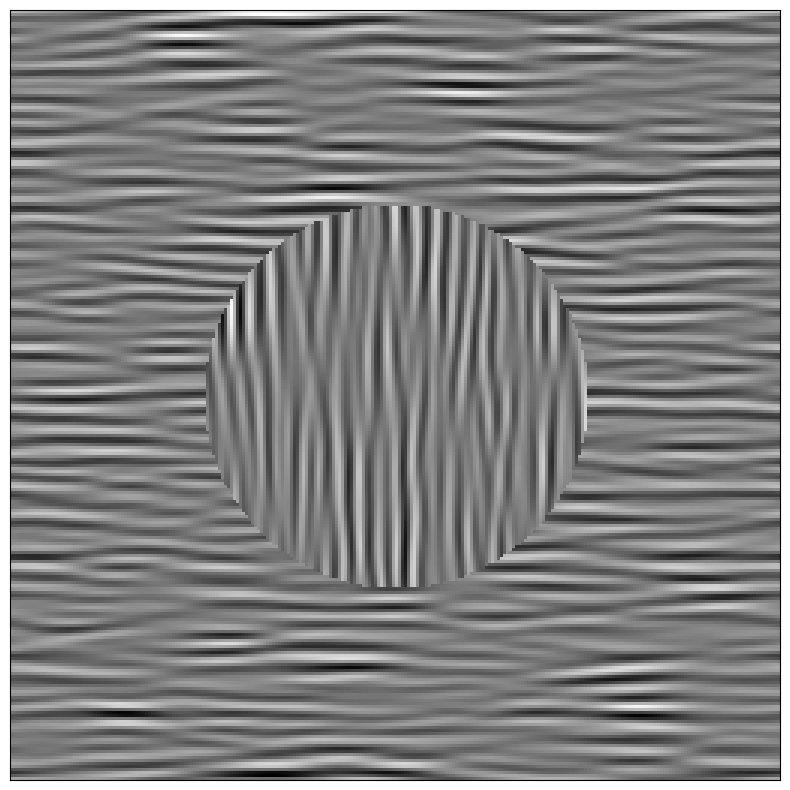

theta=0.000


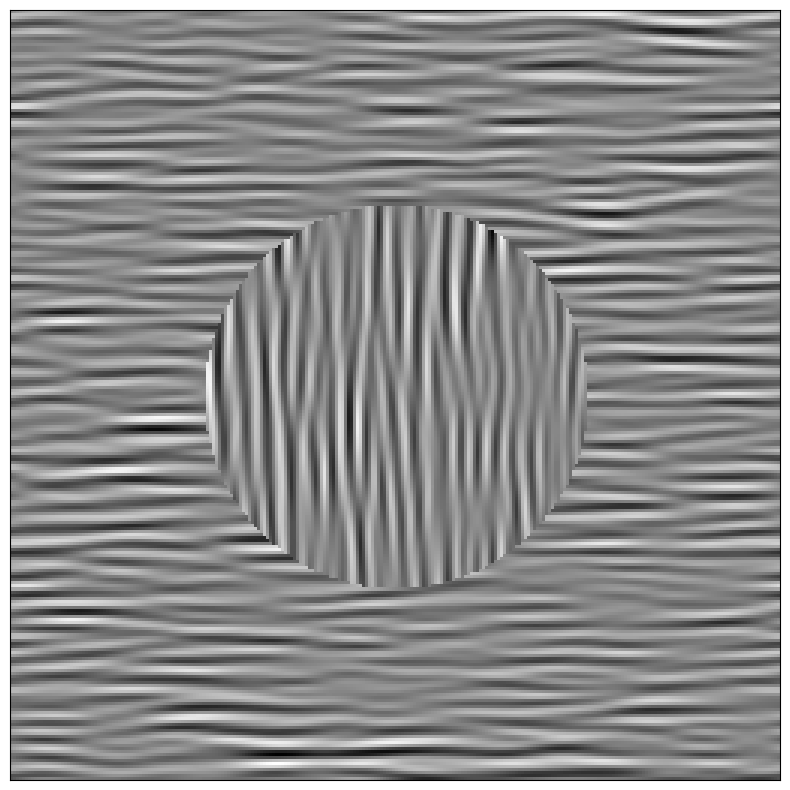

theta=0.000


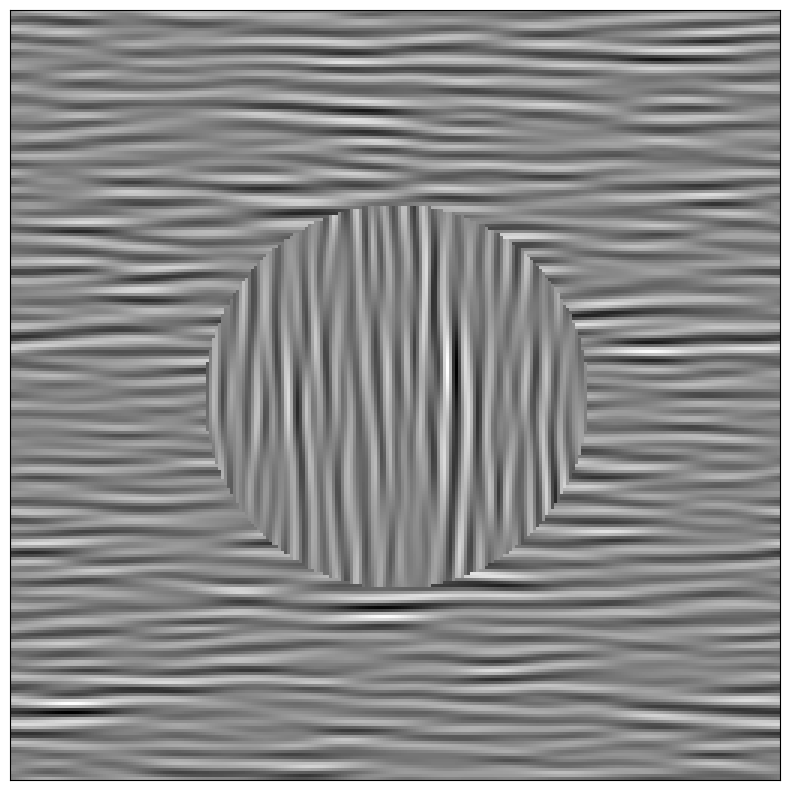

theta=0.000


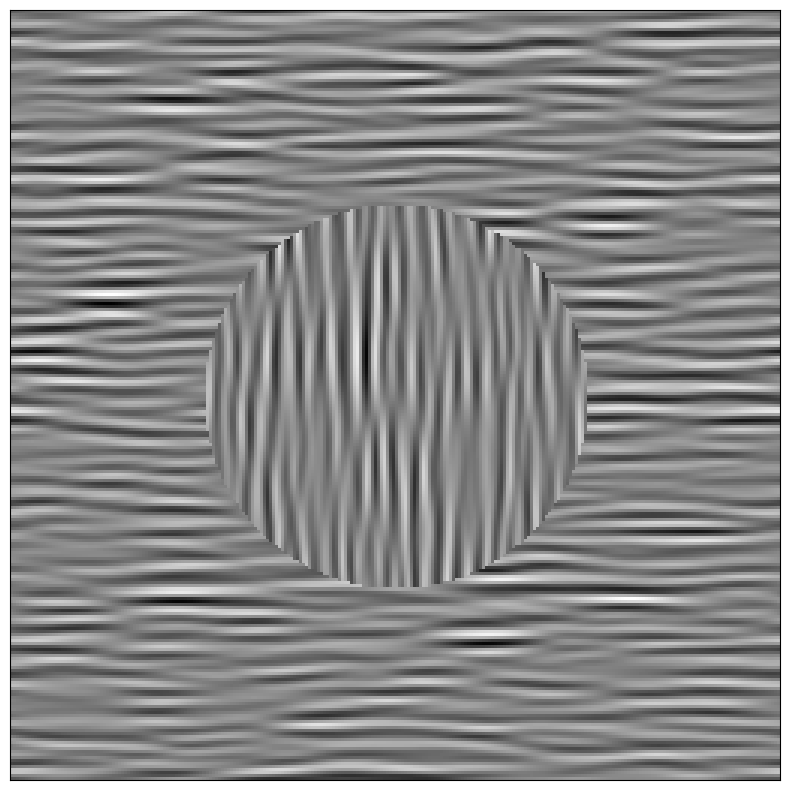

theta=0.000


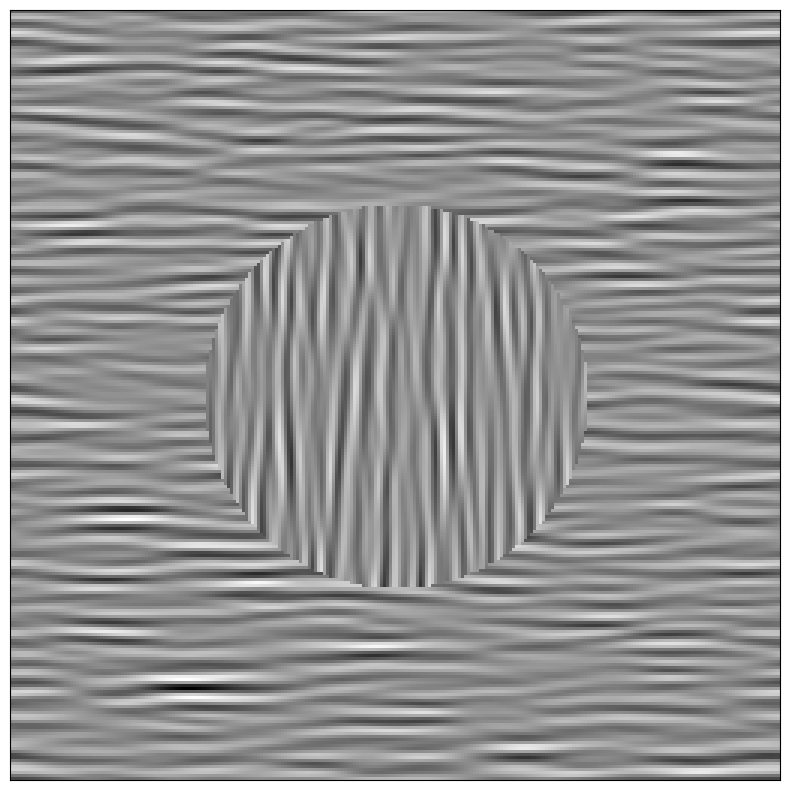

In [13]:
for theta in params['theta'] * np.geomspace(0.1, 10, 7):
    print(f'{theta=:.3f}')
    params_update = params.copy()
    params_update.update(theta=theta)
    env = mc.envelope_gabor(fx, fy, ft, **params_update)
    z = mc.rectif(mc.random_cloud(env))
    image = z.reshape((mc.N_X, mc.N_Y))
    fig, ax = plt.subplots(figsize=(10,10))
    _ = ax.imshow(crop_and_merge(image, rho=.25, use_rot=True), cmap=plt.gray())
    plt.show()

B_theta=0.010


/opt/homebrew/lib/python3.11/site-packages/MotionClouds.py:275: RuntimeWarning: overflow encountered in exp
  enveloppe_orientation = np.exp(np.cos(2*(angle-theta))/4/B_theta**2)
/opt/homebrew/lib/python3.11/site-packages/MotionClouds.py:290: RuntimeWarning: invalid value encountered in multiply
  envelope *= envelope_radial(fx, fy, ft, sf_0=sf_0, B_sf=B_sf, loggabor=loggabor)


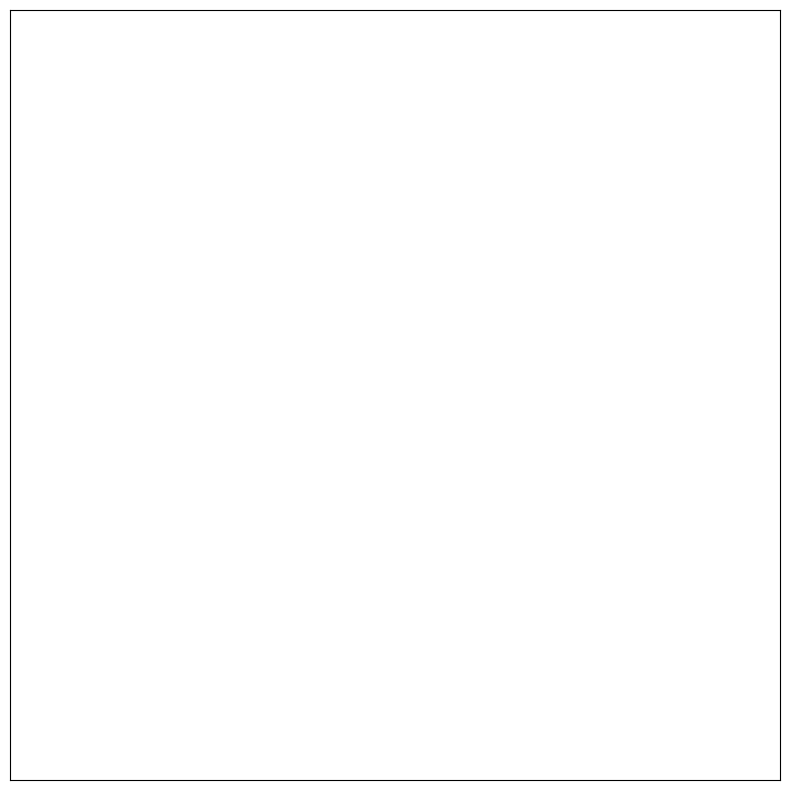

B_theta=0.022


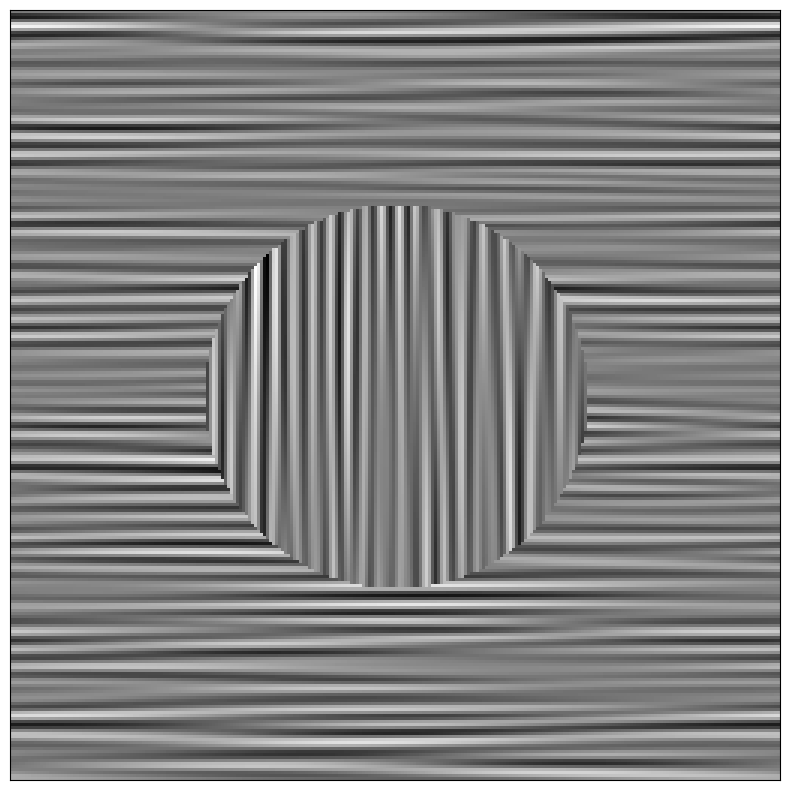

B_theta=0.046


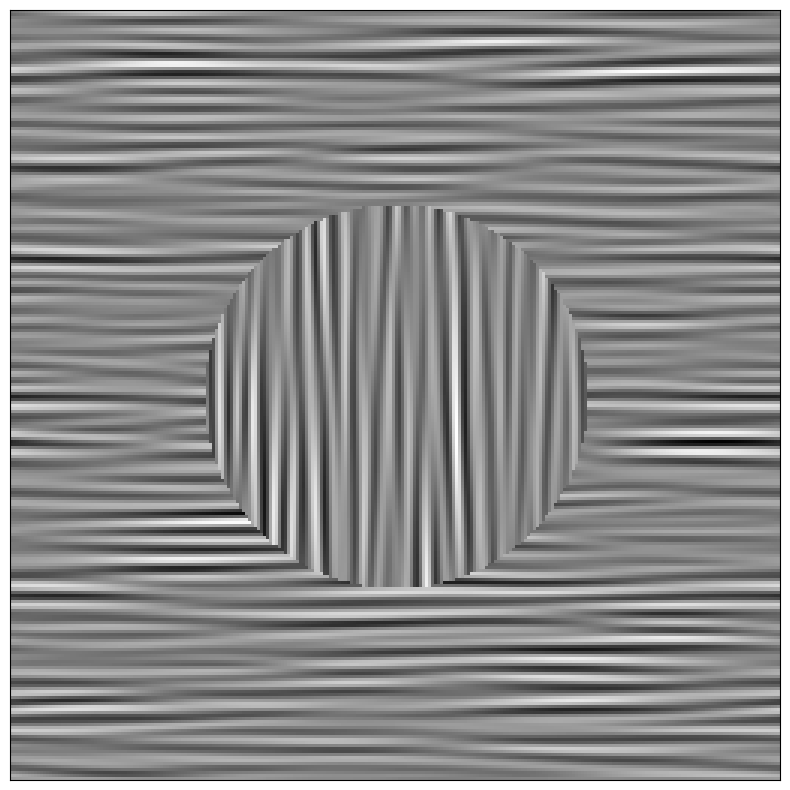

B_theta=0.100


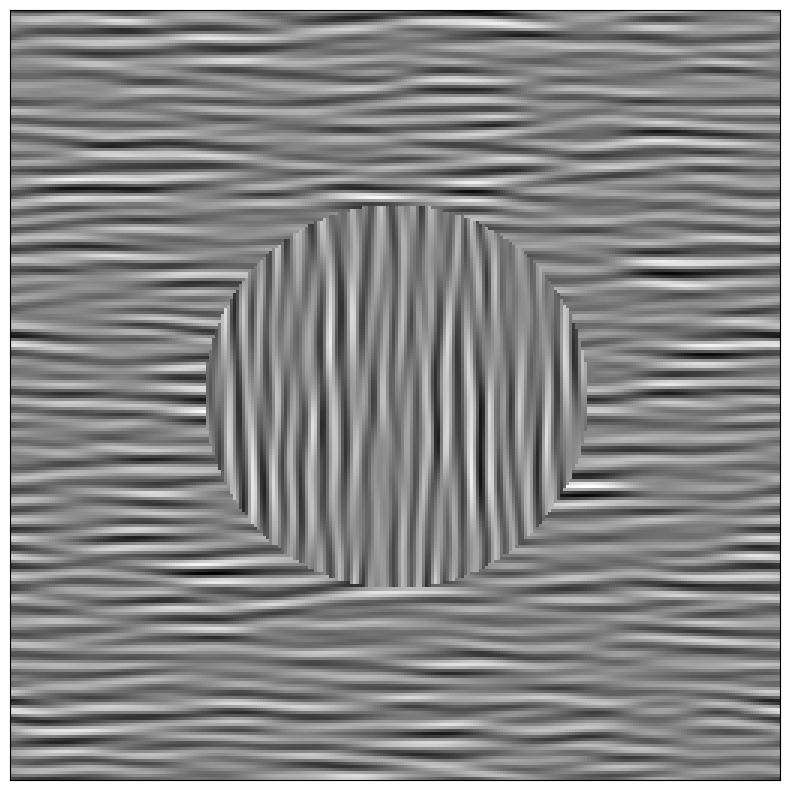

B_theta=0.215


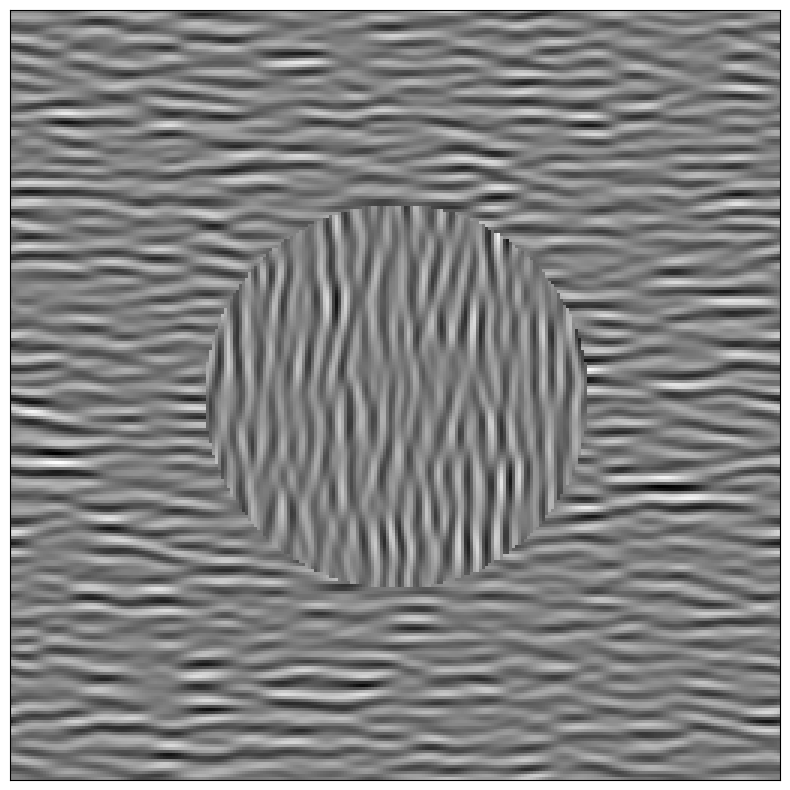

B_theta=0.464


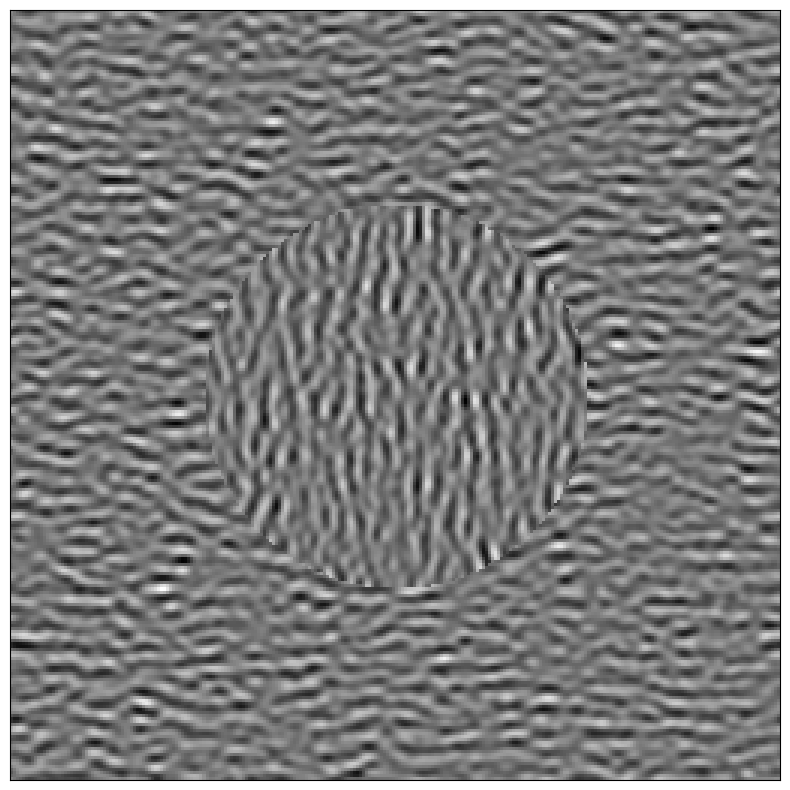

B_theta=1.000


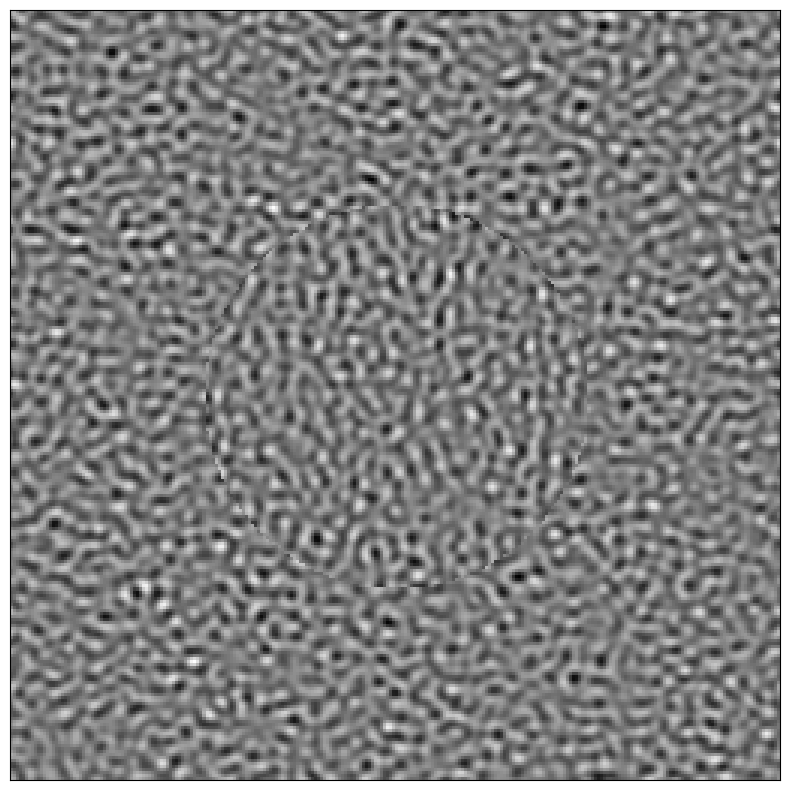

In [14]:
for B_theta in params['B_theta'] * np.geomspace(0.1, 10, 7):
    print(f'{B_theta=:.3f}')
    params_update = params.copy()
    params_update.update(B_theta=B_theta)
    env = mc.envelope_gabor(fx, fy, ft, **params_update)
    z = mc.rectif(mc.random_cloud(env))
    image = z.reshape((mc.N_X, mc.N_Y))
    fig, ax = plt.subplots(figsize=(10,10))
    _ = ax.imshow(crop_and_merge(image, rho=.25, use_rot=True), cmap=plt.gray())
    plt.show()

alpha=-1.000


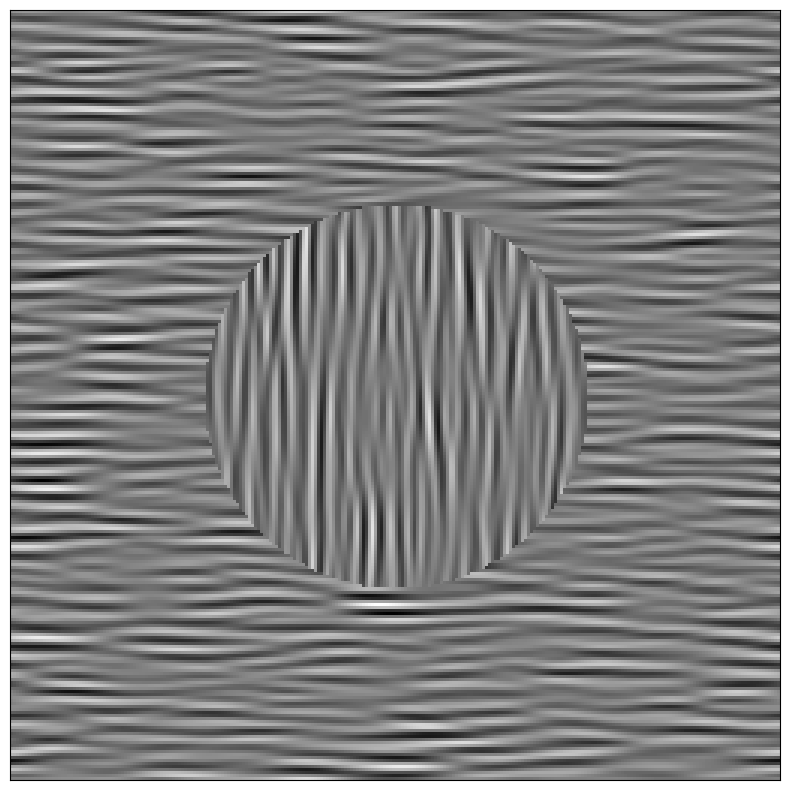

alpha=-0.500


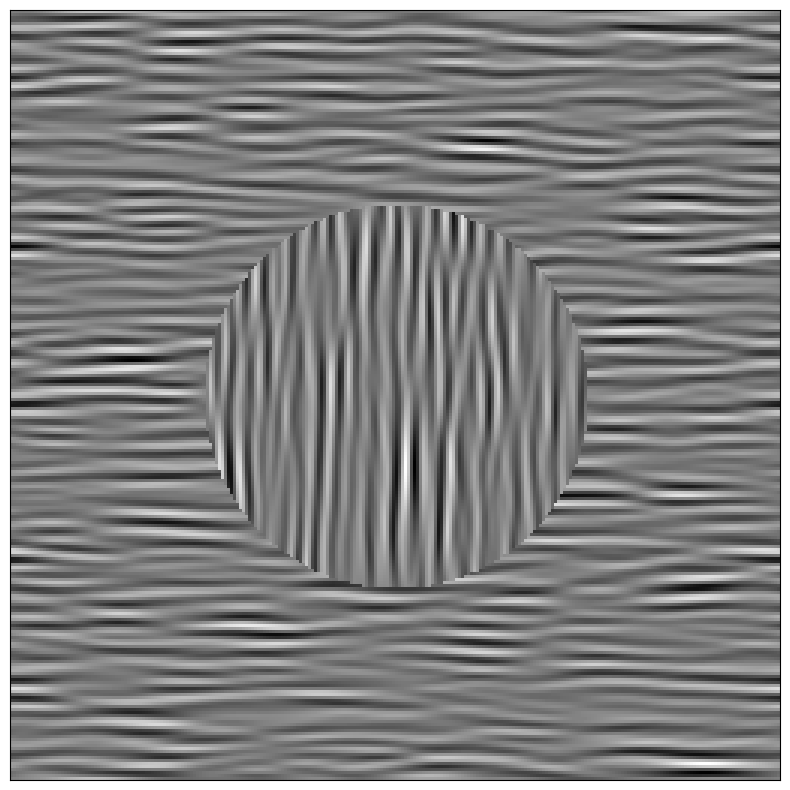

alpha=0.000


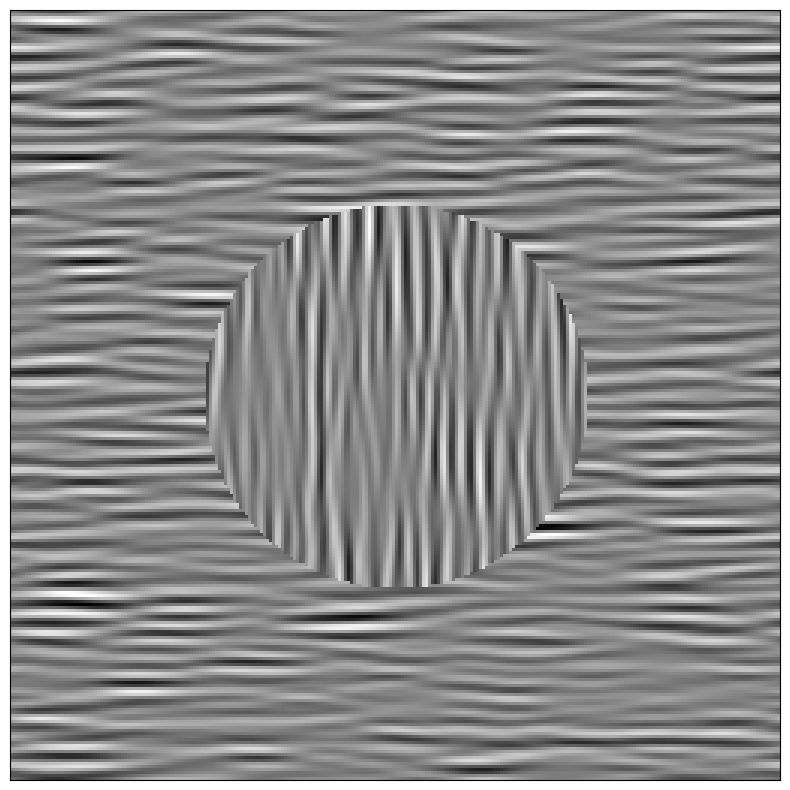

alpha=0.500


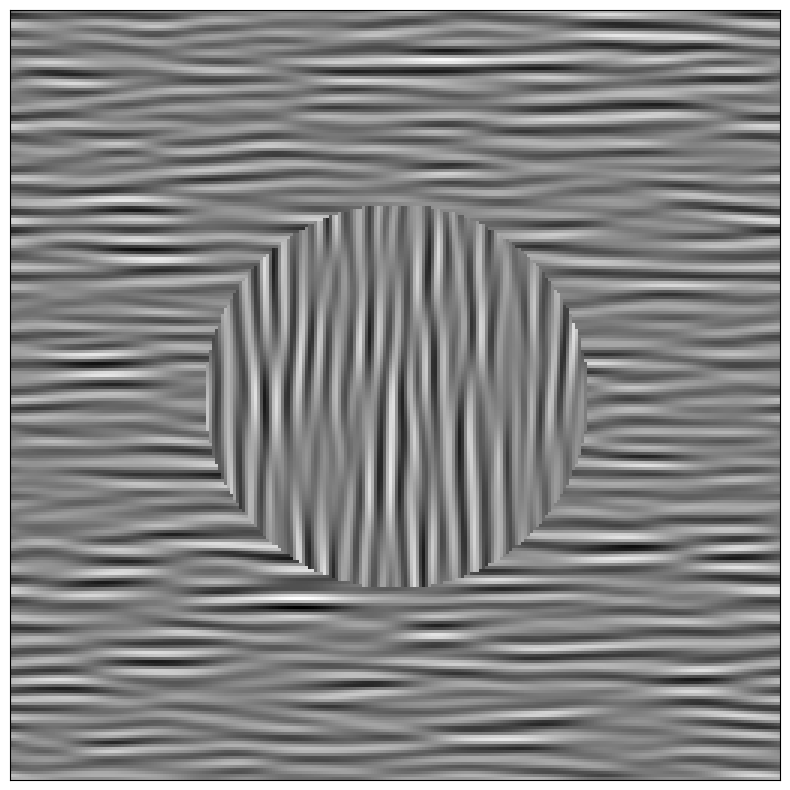

alpha=1.000


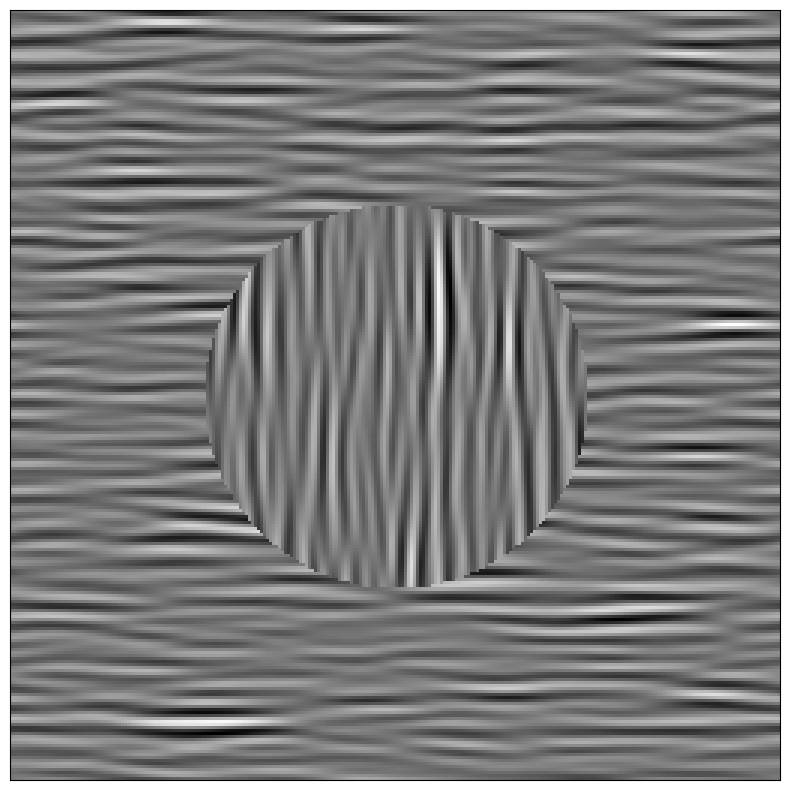

alpha=1.500


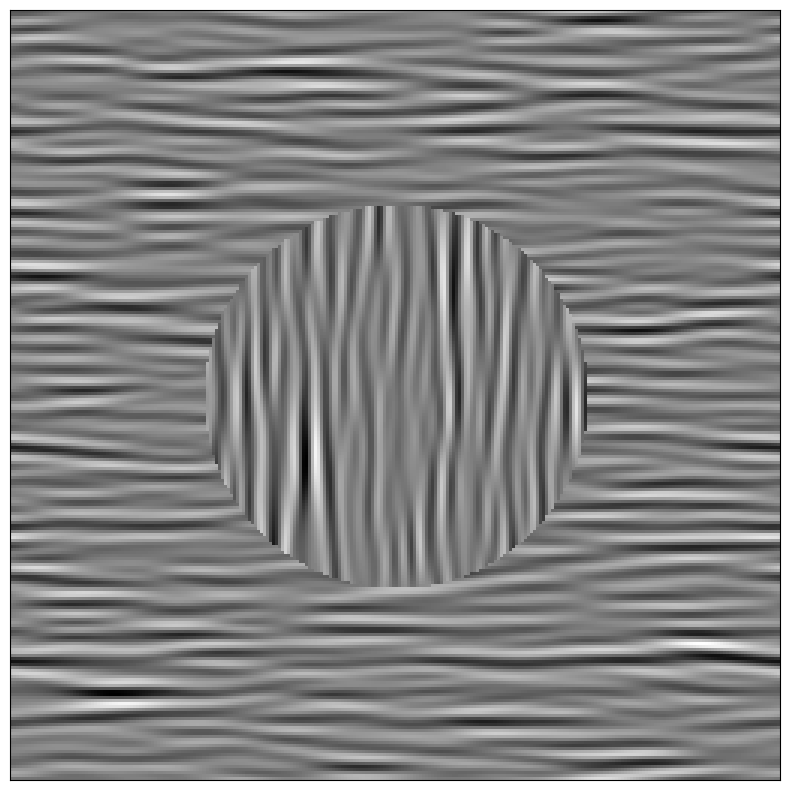

alpha=2.000


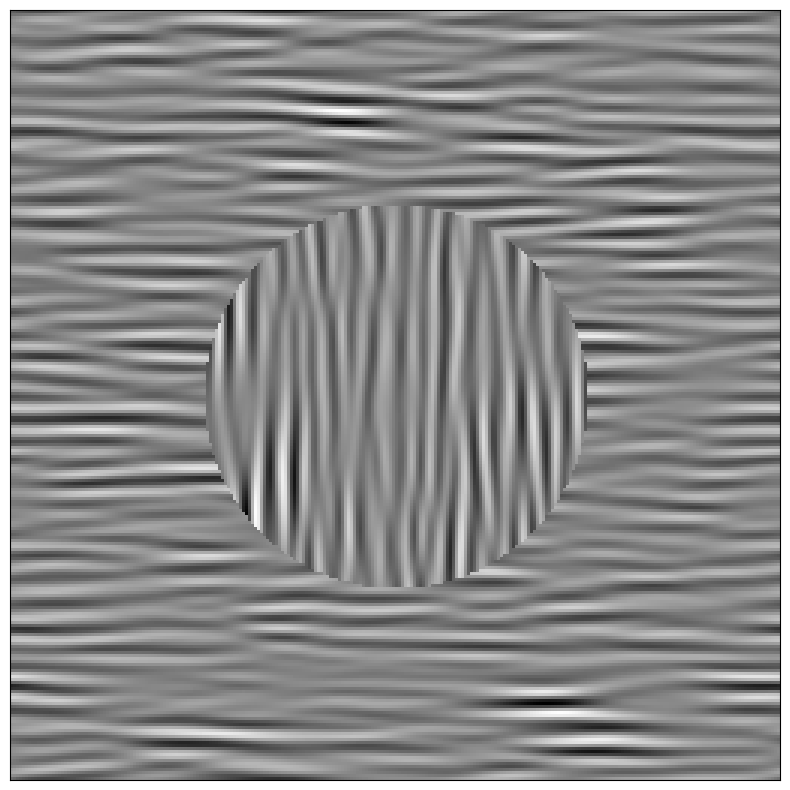

In [15]:
for alpha in np.linspace(-1, 2, 7):
    print(f'{alpha=:.3f}')
    params_update = params.copy()
    params_update.update(alpha=alpha)
    env = mc.envelope_gabor(fx, fy, ft, **params_update)
    z = mc.rectif(mc.random_cloud(env))
    image = z.reshape((mc.N_X, mc.N_Y))
    fig, ax = plt.subplots(figsize=(10,10))
    _ = ax.imshow(crop_and_merge(image, rho=.25, use_rot=True), cmap=plt.gray())
    plt.show()

## some book keeping for the notebook

In [16]:
%load_ext watermark
%watermark -i -h -m -v -p numpy,MotionClouds,matplotlib  -r -g -b

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.17.2

numpy       : 1.26.2
MotionClouds: 20220927
matplotlib  : 3.8.1

Compiler    : Clang 15.0.0 (clang-1500.0.40.1)
OS          : Darwin
Release     : 23.1.0
Machine     : arm64
Processor   : arm
CPU cores   : 10
Architecture: 64bit

Hostname: obiwan.local

Git hash: 31cdc1534359f8586c0a8c1a10d5876b26777866

Git repo: https://github.com/laurentperrinet/sciblog.git

Git branch: master

